<a href="https://colab.research.google.com/github/arosha27/DeepLearningProjects/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition using ANN on MNIST Dataset

 -  **A Deep Learning Project with TensorFlow & Keras**

# Step 1: Importing Libraries
Sequential is used to create a linear stack of layers.

  - Dense is a fully connected layer.

  - Flatten is used to convert 2D images into 1D arrays for the neural network.

In [89]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

# Step 2: Loading the MNIST Dataset

- X_train and X_test: images of handwritten digits (28x28 pixels).

- y_train and y_test: corresponding labels (0–9).

In [90]:
(X_train , y_train) ,(X_test , y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape , X_test.shape , y_train , y_test

((60000, 28, 28),
 (10000, 28, 28),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

# Viewing a Sample Image

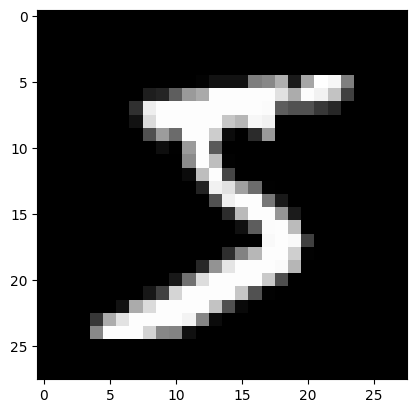

In [ ]:
#in order to look at the first image in the training data :
import matplotlib.pyplot as plt
plt.imshow(X_train[0] , cmap = "grey")

In [ ]:
# now we have to build a neural network which can learn the pixels values of the images and then decide which pixel values are pointing to which image iin the data .

# Step 4: Normalizing Pixel Values
- Pixel values are scaled from 0–255 to 0–1.

- Neural networks train better when inputs are normalized, improving convergence speed and stability.

In [ ]:
X_train = X_train/255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Step 5: Creating the Neural Network Model

- You are building an Artificial Neural Network (ANN):

    - Flatten: Converts 28x28 images into a 784-length vector.

    - Dense(128, relu): First hidden layer with 128 neurons.

    - Dense(30, relu): Second hidden layer with 30 neurons.

    - Dense(10, softmax): Output layer for 10 digit classes (0–9), softmax gives probability scores.

In [ ]:
#creating an ANN
model = Sequential()

#the model required 1D array of pixel values (784) as an input . and we have 2D array (28,28)
#flatten layer for converting higher dimension arrays to 1d
model.add(Flatten(input_shape=(28 , 28)))

#adding our first dense layer - ist hidden layer
model.add(Dense(128 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))

#adding output layer
model.add(Dense(10 , activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         3,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,660 (408.83 KB)

 Trainable params: 104,660 (408.83 KB)

 Non-trainable params: 0 (0.00 B)

# Step 6: Compiling the Model

- Loss function: sparse_categorical_crossentropy (used for integer-labeled classification).

- Optimizer: Adam, a popular optimizer.

- Metric: Track accuracy during training.

In [ ]:
#compile and train the model to understand the pixels pattern
model.compile(loss= "sparse_categorical_crossentropy", optimizer="Adam" , metrics=["accuracy"])

#sparse_categorical crossentropy loss function does not require the additional on hot encoding unlike the categorical_crossentropy


# Step 7: Training the Model


  - The model is trained for 10 epochs using 80% of the training data, while 20% is used for validation.
  - Returns history object to track loss and accuracy over epochs.

In [ ]:
#model traing
history = model.fit(X_train , y_train , epochs = 10 , validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8601 - loss: 0.4934 - val_accuracy: 0.9543 - val_loss: 0.1611
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.1240 - val_accuracy: 0.9643 - val_loss: 0.1168
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9770 - loss: 0.0763 - val_accuracy: 0.9701 - val_loss: 0.0994
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0609 - val_accuracy: 0.9671 - val_loss: 0.1193
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9862 - loss: 0.0437 - val_accuracy: 0.9713 - val_loss: 0.1003
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9899 - loss: 0.0329 - val_accuracy: 0.9754 - val_loss: 0.0966
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.9734 - val_loss: 0.1011
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0206 - 

# Step 8: Making Predictions
- y_prob contains predicted probabilities for all test samples.

- y_pred contains the actual predicted class labels (using argmax to pick the class with highest probability).

In [ ]:
#prediction on testing data
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Step 9: Evaluating the Model
- You compute the final test accuracy using sklearn.

In [ ]:
#evaluation by finding the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred , y_test)
accuracy

0.9765

# Step 10: Plotting Training Metrics
You plot:

- Training vs Validation Loss

- Training vs Validation Accuracy

📊 These graphs help visualize model performance and check for overfitting

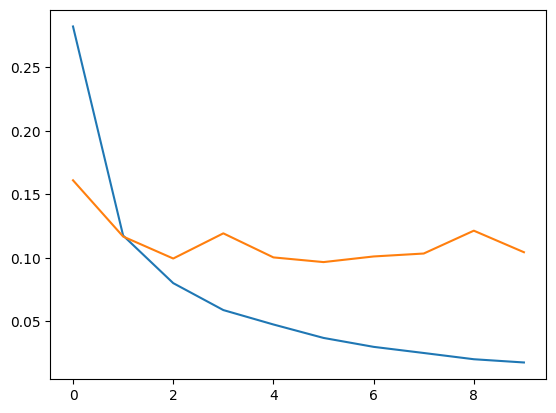

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

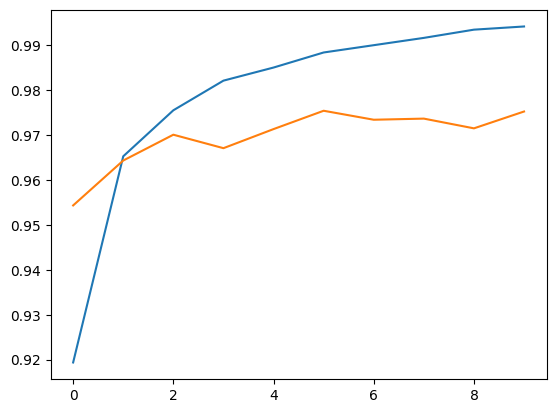

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

(<matplotlib.image.AxesImage at 0x799b5e5f91d0>, (28, 28))

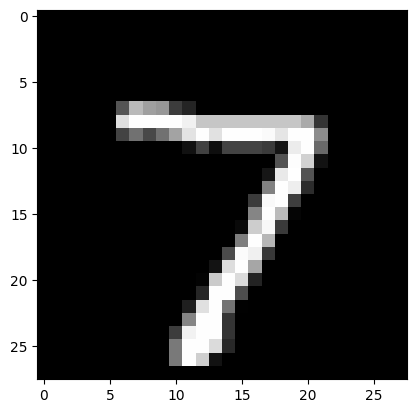

In [ ]:
# predictions on some sample images
plt.imshow(X_test[0] , cmap = "grey") , X_test[0].shape

# Step 11: Visualizing Predictions on Random Images

- You select 10 random images from the test set.

- Predict their labels using the model.

- Display each image with its predicted label.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


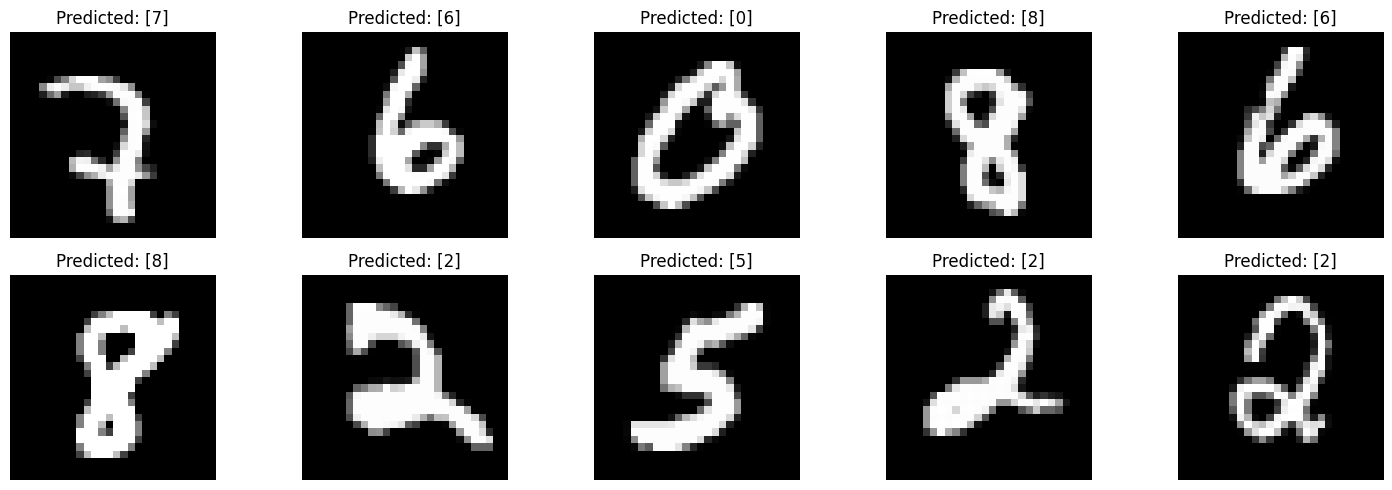

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select 10 random indices from X_test
random_indices = np.random.choice(len(X_test), size=10)

# Create a figure
plt.figure(figsize=(15,5))

# Loop through the random indices
for i, idx in enumerate(random_indices):
    # Predict the label
    pred = model.predict(X_test[idx].reshape(1, 28, 28)).argmax(axis=1)

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Predicted: {pred}")
    plt.axis('off')

plt.tight_layout()
plt.show()
